#1. 기본 개념 소개
##1.1. 지도 시각화의 중요성 및 사용 사례
[지도 시각화의 중요성]

* 공간적 인사이트: 데이터의 공간적 분포와 패턴을 직관적으로 파악할 수 있습니다.
* 의사결정 지원: 지리적 위치에 따른 데이터 분석을 통해 더 효과적인 의사결정을 할 수 있습니다.
* 상호작용: 대화식 지도는 사용자와의 상호작용을 통해 더 많은 정보와 통찰력을 제공합니다.
* 이해력 향상: 지도를 통해 복잡한 데이터도 쉽게 이해할 수 있습니다.

[사용 사례]

* 부동산 가격 시각화: 도시의 다양한 지역별 부동산 가격 변동을 시각화하여 투자 또는 구매 결정을 지원합니다.
* 범죄 발생률: 지역별 범죄 발생률을 시각화하여 안전한 지역을 파악하거나 경찰력 배치를 계획합니다.
* 사업 장소 선정: 상업 지역, 교통 편리성, 인구 밀도 등의 데이터를 기반으로 최적의 사업 장소를 선정합니다.
* 환경 모니터링: 지역별 오염 농도나 기후 변화를 시각화하여 환경 보호 전략을 개발합니다.


In [2]:
!pip install folium

In [3]:
import numpy as np
import pandas as pd
import folium

In [4]:
import warnings

warnings.filterwarnings(action='ignore')

In [17]:
#한글깨짐 해결
# !pip3 install git+https://github.com/python-visualization/branca.git@master

```
folium.Map(location = [위도, 경도], zoom_start = 10)
```

zoom_start : 줌인 하는 정도

In [18]:
m = folium.Map(
    location=[33.3684955195788, 126.52918183373025]
)

m

In [19]:
m = folium.Map(
    location = [33.3684955195788, 126.52918183373025],
    #tiles = 'Stamen Terrain',
    zoom_start = 13
)

m

- popup : 마커의 팝업 레이블 설정
- tooltip : 마커 위로 마우스를 가져가면 텍스트를 표시

In [20]:
tooltip = 'Click!!'

# 지도 마커 추가
folium.Marker(
    [33.3684955195788, 126.52918183373025],
    popup = '<strong>hello world</strong>',
    tooltip = tooltip
).add_to(m)

m

지도를 html 파일로도 저장할 수 있습니다

In [21]:
m.save('index.html')

In [22]:
m = folium.Map(
    location = [33.3684955195788, 126.52918183373025],
    #tiles = 'Stamen Terrain',
    zoom_start = 10
)

tooltip = 'Click!!'

folium.Marker(
    [33.3684955195788, 126.52918183373025],
    popup = '<strong>한라산</strong>',
    tooltip = tooltip
).add_to(m)

folium.Marker(
    [33.51048502651309, 126.49132121516628],
    popup = '<strong>제주국제공항</strong>',
    tooltip = tooltip
).add_to(m)

folium.Marker(
    [33.508461049711265, 126.54097984346038],
    popup = '<strong>바울랩</strong>',
    tooltip = tooltip
).add_to(m)

m

In [23]:
m = folium.Map(
    location = [33.3684955195788, 126.52918183373025],
    #tiles = 'Stamen Terrain',
    zoom_start = 10
)

tooltip = 'Click!!'

folium.Marker(
    [33.3684955195788, 126.52918183373025],
    popup = '<strong>한라산</strong>',
    tooltip = tooltip,
    icon = folium.Icon(color='#ff0000', icon='info-sign')
).add_to(m)

folium.Marker(
    [33.51048502651309, 126.49132121516628],
    popup = '<strong>제주국제공항</strong>',
    tooltip = tooltip,
    icon = folium.Icon(color='green', icon='bookmark')
).add_to(m)

folium.Marker(
    [33.508461049711265, 126.54097984346038],
    popup = '<strong>바울랩</strong>',
    tooltip = tooltip
).add_to(m)

m

In [24]:
from folium.plugins import MarkerCluster

# 지도 생성
m = folium.Map(location=[37.5665, 126.9780], zoom_start=12)

# 마커 클러스터 생성
marker_cluster = MarkerCluster().add_to(m)

# 여러 위치에 마커 추가
locations = [
    [37.5665, 126.9780],
    [37.5776, 126.9768],
    [37.5592, 126.982],
    [37.5653, 126.9896]
]

for location in locations:
    folium.Marker(location).add_to(marker_cluster)

m

실습

In [25]:
# 기준 위치 설정 (서울시 중심)
base_location = [37.5665, 126.9780]

num_shops = 100

# 무작위로 상점 위치와 매출 생성
np.random.seed(42)  # 일관된 결과를 위해 seed 설정
lats = base_location[0] + np.random.rand(num_shops) * 0.05
lngs = base_location[1] + np.random.rand(num_shops) * 0.05
sales = np.random.randint(100000, 100000000, num_shops)

shops_data = list(zip(lats, lngs, sales))
shops_data[:5]  # 처음 5개 상점의 데이터를 출력합니다.

[(37.585227005942365, 126.97957145928433, 73250359),
 (37.61403571532049, 127.00982052056318, 30931219),
 (37.60309969709057, 126.99371779905381, 93042922),
 (37.59643292420985, 127.00342853455822, 23201383),
 (37.57430093202212, 127.02337832369629, 17669187)]

In [26]:
# 기본 지도 생성
m = folium.Map(location=base_location, zoom_start=13)

In [27]:
# 매출에 따른 마커 색상 설정 함수
def get_color(sale):
    if sale > 80000000:
        return 'red'
    elif sale > 50000000:
        return 'orange'
    else:
        return 'blue'

In [28]:
# 상점 데이터를 지도에 추가
for lat, lng, sale in shops_data:
    folium.Marker(
        location=[lat, lng],
        icon=folium.Icon(color=get_color(sale)),
        popup=f"매출: {sale:,}원"
    ).add_to(m)

m

In [29]:
# 격자 크기 설정
grid_size = 0.01  # 0.01도

# 지역의 경계 설정
lat_min, lat_max = base_location[0] - 0.05, base_location[0] + 0.05
lng_min, lng_max = base_location[1] - 0.05, base_location[1] + 0.05

# 격자 크기에 따른 격자 수 계산 (1을 추가하여 경계를 포함)
num_lat_grids = int((lat_max - lat_min) // grid_size) + 1
num_lng_grids = int((lng_max - lng_min) // grid_size) + 1

# 격자별 상점 수와 총 매출 초기화
shop_counts = np.zeros((num_lat_grids, num_lng_grids))
total_sales = np.zeros_like(shop_counts)

# 각 상점 데이터를 격자에 할당
for lat, lng, sale in shops_data:
    i = int((lat - lat_min) // grid_size)
    j = int((lng - lng_min) // grid_size)
    shop_counts[i, j] += 1
    total_sales[i, j] += sale

# 격자별 평균 매출 계산 (0으로 나누는 것을 방지하기 위해 np.where 사용)
avg_sales = np.where(shop_counts != 0, total_sales / shop_counts, 0)

shop_counts, avg_sales

(array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 5., 7., 4., 5., 7.],
        [0., 0., 0., 0., 0., 3., 4., 3., 4., 4.],
        [0., 0., 0., 0., 0., 3., 4., 2., 2., 6.],
        [0., 0., 0., 0., 0., 4., 5., 3., 3., 4.],
        [0., 0., 0., 0., 0., 3., 6., 3., 3., 3.]]),
 array([[       0.        ,        0.        ,        0.        ,
                0.        ,        0.        ,        0.        ,
                0.        ,        0.        ,        0.        ,
                0.        ],
        [       0.        ,        0.        ,        0.        ,
                0.        ,        0.        ,        0.        ,
                0.        ,        0.        ,        0.        ,
                0.        ],
        [       0.        ,        0.       

In [30]:
# 격자의 색상 결정 함수
def get_density_color(count):
    if count > 5:
        return 'red'
    elif count > 2:
        return 'orange'
    elif count > 0:
        return 'yellow'
    else:
        return 'transparent'

In [31]:
# 밀집도에 따른 지도 생성
density_map = folium.Map(location=base_location, zoom_start=13)

for i in range(num_lat_grids):
    for j in range(num_lng_grids):
        # 격자의 중심점 계산
        center_lat = lat_min + i * grid_size + grid_size / 2
        center_lng = lng_min + j * grid_size + grid_size / 2

        # 격자 표시
        folium.Rectangle(
            bounds=[[lat_min + i * grid_size, lng_min + j * grid_size],
                    [lat_min + (i + 1) * grid_size, lng_min + (j + 1) * grid_size]],
            color=get_density_color(shop_counts[i, j]),
            fill=get_density_color(shop_counts[i, j]),
            fill_opacity=0.4,
            popup=f"상점 수: {int(shop_counts[i, j])}"
        ).add_to(density_map)

density_map

산불 발생 확률 예측 및 시각화

In [32]:
# 1024개의 격자 데이터 설정
grid_size = 0.01
lats = np.linspace(base_location[0] - (grid_size * 32), base_location[0] + (grid_size * 32), 32)
lngs = np.linspace(base_location[1] - (grid_size * 32), base_location[1] + (grid_size * 32), 32)
grid_centers = [(lat, lng) for lat in lats for lng in lngs]

In [33]:
# 가상의 기온, 습도, 강수량 데이터 생성
temperatures = np.random.uniform(15, 40, 1024)  # 15도 ~ 40도 사이
humidities = np.random.uniform(10, 100, 1024)  # 습도 10% ~ 100% 사이
rainfalls = np.random.uniform(0, 200, 1024)    # 강수량 0mm ~ 200mm 사이

In [34]:
# 산불 발생 확률이 높은 조건을 갖는 지역 선택 (20%)
num_fire_zones = int(0.2 * 1024)
fire_indices = np.random.choice(1024, num_fire_zones, replace=False)
temperatures[fire_indices] = np.random.uniform(30, 40, num_fire_zones)
humidities[fire_indices] = np.random.uniform(10, 30, num_fire_zones)
rainfalls[fire_indices] = np.random.uniform(0, 20, num_fire_zones)

In [35]:
# 데이터프레임 생성
df_1024 = pd.DataFrame(grid_centers, columns=['Latitude', 'Longitude'])
df_1024['Temperature'] = temperatures
df_1024['Humidity'] = humidities
df_1024['Rainfall'] = rainfalls

In [38]:
def wildfire_probability(temperature, humidity, rainfall):
    # 기온이 높고, 습도가 낮으며, 강수량이 적을수록 산불 발생 확률이 높아진다고 가정
    prob = (temperature / 40) * (1 - humidity / 100) * (1 - rainfall / 200)
    return prob

In [39]:
# 산불 발생 확률 계산
probs = df_1024.apply(lambda row: wildfire_probability(row['Temperature'], row['Humidity'], row['Rainfall']), axis=1)
df_1024['Wildfire_Prob'] = probs
df_1024['Wildfire'] = (probs > 0.5).astype(int)

In [40]:
# 로지스틱 회귀 모델 학습
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = df_1024[['Temperature', 'Humidity', 'Rainfall']]
y = df_1024['Wildfire']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LogisticRegression()
lr.fit(X_train, y_train)

# 전체 데이터에 대한 산불 발생 확률 예측
predicted_probs = lr.predict_proba(X)[:, 1]
df_1024['Predicted_Wildfire_Prob'] = predicted_probs

In [42]:
def get_prediction_color(prob):
    if prob > 0.75:
        return 'red'
    elif prob > 0.5:
        return 'orange'
    elif prob > 0.25:
        return 'yellow'
    else:
        return 'blue'

In [43]:
# 지도에 예측 결과 시각화
prediction_map_1024 = folium.Map(location=base_location, zoom_start=11)

for _, row in df_1024.iterrows():
    lat, lng = row['Latitude'], row['Longitude']
    prob = row['Predicted_Wildfire_Prob']

    # 격자 표시
    folium.Rectangle(
        bounds=[[lat - grid_size / 2, lng - grid_size / 2],
                [lat + grid_size / 2, lng + grid_size / 2]],
        color=get_prediction_color(prob),
        fill=get_prediction_color(prob),
        fill_opacity=0.4,
        popup=f"산불 발생 확률: {prob:.2f}"
    ).add_to(prediction_map_1024)

prediction_map_1024

---

20230829

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 16 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 0s (34.1 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 120831 files and direc

In [5]:
# 제주시청 - 클릭 위치의 위도는 33.50028185187966, 경도는 126.53145977090163 입니다
# http://map.esran.com/

# 위도
latitude = 33.50028185187966
# 경도
longitude = 126.53145977090163

In [6]:

# 코드입력
m = folium.Map(location=[latitude, longitude],
               zoom_start=10, # Zoom in ~ out 최대 18까지
               width=750,
               height=500
              )
m

## 마커 추가

- `location`: 마커를 추가할 **위도/경도 좌표**를 입력 후
- `popup`: 표기할 팝업 문구 지정 (마우스 클릭시 표기되는 문구)
- `tooltip`: 표기할 툴팁 지정 (마우스 오버시 표기되는 문구)

마커를 생성 후 기존에 생성된 지도 `m`에 추가합니다.

In [7]:
# 코드입력
folium.Marker([latitude, longitude],
              popup="제주시청",
              tooltip="제주시청 주변 지도").add_to(m)
m

마커에 대한 스타일 변경도 가능합니다. 스타일 변경시 icon 파라미터에 folium.Icon(color=?, icon=?)을 지정합니다.

In [8]:
# 코드입력
folium.Marker([latitude, longitude],
              popup="제주시청",
              tooltip="제주시청 주변 지도",
              icon=folium.Icon('red', icon='star'),
             ).add_to(m)
m

popup이나 tooltip에 다음과 같이 html 코드를 삽입하여 이미지를 표기하거나 심지어 YouTube 영상도 삽입할 수 있습니다.

In [9]:
folium.Marker([latitude, longitude],
              popup='<iframe width="560" height="315" src="https://www.youtube.com/watch?v=ka-8OE8F_nY" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>',
              tooltip="위니브 홍보 영상").add_to(m)
m

In [10]:
folium.CircleMarker([latitude, longitude],
                    color='tomato',
                    radius = 50,
                    tooltip='제주시청 주변').add_to(m)
m

# 실습 1

In [11]:
import pandas as pd

# 코드입력
df = pd.read_csv('/content/소상공인시장진흥공단_상가_상권_정보_제주_202212.csv')
df.head(3)

상가업소번호            상호명  지점명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드 상권업종중분류명  \
0  21706657          동경부동산  NaN         L      부동산       L01    부동산중개   
1  17174231  에프케이알레그리아호텔제주  NaN         O       숙박       O01    호텔/콘도   
2  17173846       아빠가닭튀기는집  NaN         Q       음식       Q09     유흥주점   

  상권업종소분류코드 상권업종소분류명 표준산업분류코드  ...                     건물관리번호           건물명  \
0    L01A01    부동산중개   L68221  ...  5013010100102900005031397         동문레코드   
1    O01A01    호텔/콘도      NaN  ...  5013010100103190002000005  비스타케이호텔(천지연)   
2    Q09A01    호프/맥주   I56219  ...  5011025024011990003006865           NaN   

                             도로명주소   구우편번호  신우편번호  동정보  층정보  호정보          경도  \
0     제주특별자치도 서귀포시 중앙로 70-1, (서귀동)  697843  63591  NaN  NaN  NaN  126.561556   
1   제주특별자치도 서귀포시 중앙로47번길 25, (서귀동)  697844  63592  NaN  NaN  NaN  126.559015   
2  제주특별자치도 제주시 한림읍 한림중앙로 26, (한림리)  695932  63032  NaN  NaN  NaN  126.264860   

          위도  
0  33.250877  
1  33.248179  
2  33.412363  

[3 rows x 39 columns]

In [12]:
df.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

In [14]:
sub_df = df.loc[df['행정동명'].isin(['아라동']), ['위도', '경도', '상호명']]
sub_df.head(3)

위도          경도      상호명
49  33.471712  126.573797       월계
72  33.456081  126.556897  한라카페테리아
88  33.484283  126.543830   영산강가마솥

## 클러스터 생성

In [15]:
from folium.plugins import MarkerCluster

m = folium.Map(
    location=[latitude, longitude],
    zoom_start=15
)

coords = sub_df[['위도', '경도']]

In [16]:
# 코드입력
marker_cluster = MarkerCluster().add_to(m)

for lat, long in zip(coords['위도'], coords['경도']):
    folium.Marker([lat, long], icon = folium.Icon(color="green")).add_to(marker_cluster)
m

## 제주 지도에서 행정 구역별 표시

In [18]:
import requests
import json

file_path = "/content/hangjeongdong_제주특별자치도.geojson"

with open(file_path, "r", encoding="utf-8") as f:
    jeju_geojson = json.load(f)

jeju_geojson

{'type': 'FeatureCollection',
 'name': 'temp',
 'crs': {'type': 'name',
  'properties': {'name': 'urn:ogc:def:crs:OGC:1.3:CRS84'}},
 'features': [{'type': 'Feature',
   'properties': {'OBJECTID': 3394,
    'adm_nm': '제주특별자치도 제주시 한림읍',
    'adm_cd': '3901011',
    'adm_cd2': '5011025000',
    'sgg': '50110',
    'sido': '50',
    'sidonm': '제주특별자치도',
    'sggnm': '제주시'},
   'geometry': {'type': 'MultiPolygon',
    'coordinates': [[[[126.23127933634665, 33.4047465707345],
       [126.22993897332888, 33.40412962446276],
       [126.22589028533956, 33.40408960161301],
       [126.22500509205072, 33.404219774806876],
       [126.22487574987228, 33.40424582326579],
       [126.2233554133589, 33.40497269590151],
       [126.22323427626428, 33.40503080086705],
       [126.22243703533582, 33.40548011869599],
       [126.22209085104105, 33.405681356174604],
       [126.22201762958439, 33.405787125027516],
       [126.22198203505886, 33.40588897944633],
       [126.22180012754559, 33.410023490935

제주 지역의 구별 boundary 시각화

In [19]:
m = folium.Map(
    location=[33.50028185187966, 126.53145977090163],
    zoom_start=11,
)

# 코드입력
folium.GeoJson(
    jeju_geojson,
    name='지역명'
).add_to(m)

m

## tiles 옵션 변경을 통해 지도의 테마 변경

지도의 기본 테마(tiles)는 `OpenStreetMap`으로 설정되어 있는데, 이를 변경하여 다른 지도 테마를 적용할 수 있다.

### `Stamen Toner` 적용시

In [20]:
m = folium.Map(
    location=[33.50028185187966, 126.53145977090163],
    zoom_start=11,
    # 타일변경
    tiles='Stamen Toner'
)

folium.GeoJson(
    jeju_geojson,
    name='지역명'
).add_to(m)

m

### `cartodbpositron` 적용시

In [21]:
m = folium.Map(
    location=[33.50028185187966, 126.53145977090163],
    zoom_start=11,
    # 타일변경
    tiles='cartodbpositron'
)

folium.GeoJson(
    jeju_geojson,
    name='지역구'
).add_to(m)

m

In [22]:
# 필요한 컬럼 정보만 가져옵니다
jeju = df[['시군구명', '상권업종대분류명', '상권업종중분류명', '위도', '경도']]
jeju

시군구명 상권업종대분류명       상권업종중분류명         위도          경도
0      서귀포시      부동산          부동산중개  33.250877  126.561556
1      서귀포시       숙박          호텔/콘도  33.248179  126.559015
2       제주시       음식           유흥주점  33.412363  126.264860
3       제주시    생활서비스        이/미용/건강  33.485978  126.474887
4       제주시       소매     가정/주방/인테리어  33.511339  126.517956
...     ...      ...            ...        ...         ...
52832  서귀포시      부동산             분양  33.473977  126.905668
52833   제주시       소매       애견/애완/동물  33.470180  126.576264
52834   제주시      부동산          부동산중개  33.480752  126.544083
52835   제주시       소매  예술품/골동품/수석/분재  33.501312  126.519375
52836  서귀포시      부동산             분양  33.242375  126.601911

[52837 rows x 5 columns]

In [28]:
!pip install koreanize_matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 39.6 MB/s eta 0:00:00


In [29]:
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns


# 한글 폰트 설정
# plt.rcParams['font.family'] = 'NanumGothic'
# plt.rcParams['font.family'] = 'AppleGothic'

시각화 모듈을 import 하고 제주시의 업종별 개수를 시각화합니다.

제주시의 상권업종중분류명에 따른 데이터 개수를 시각화 합니다.

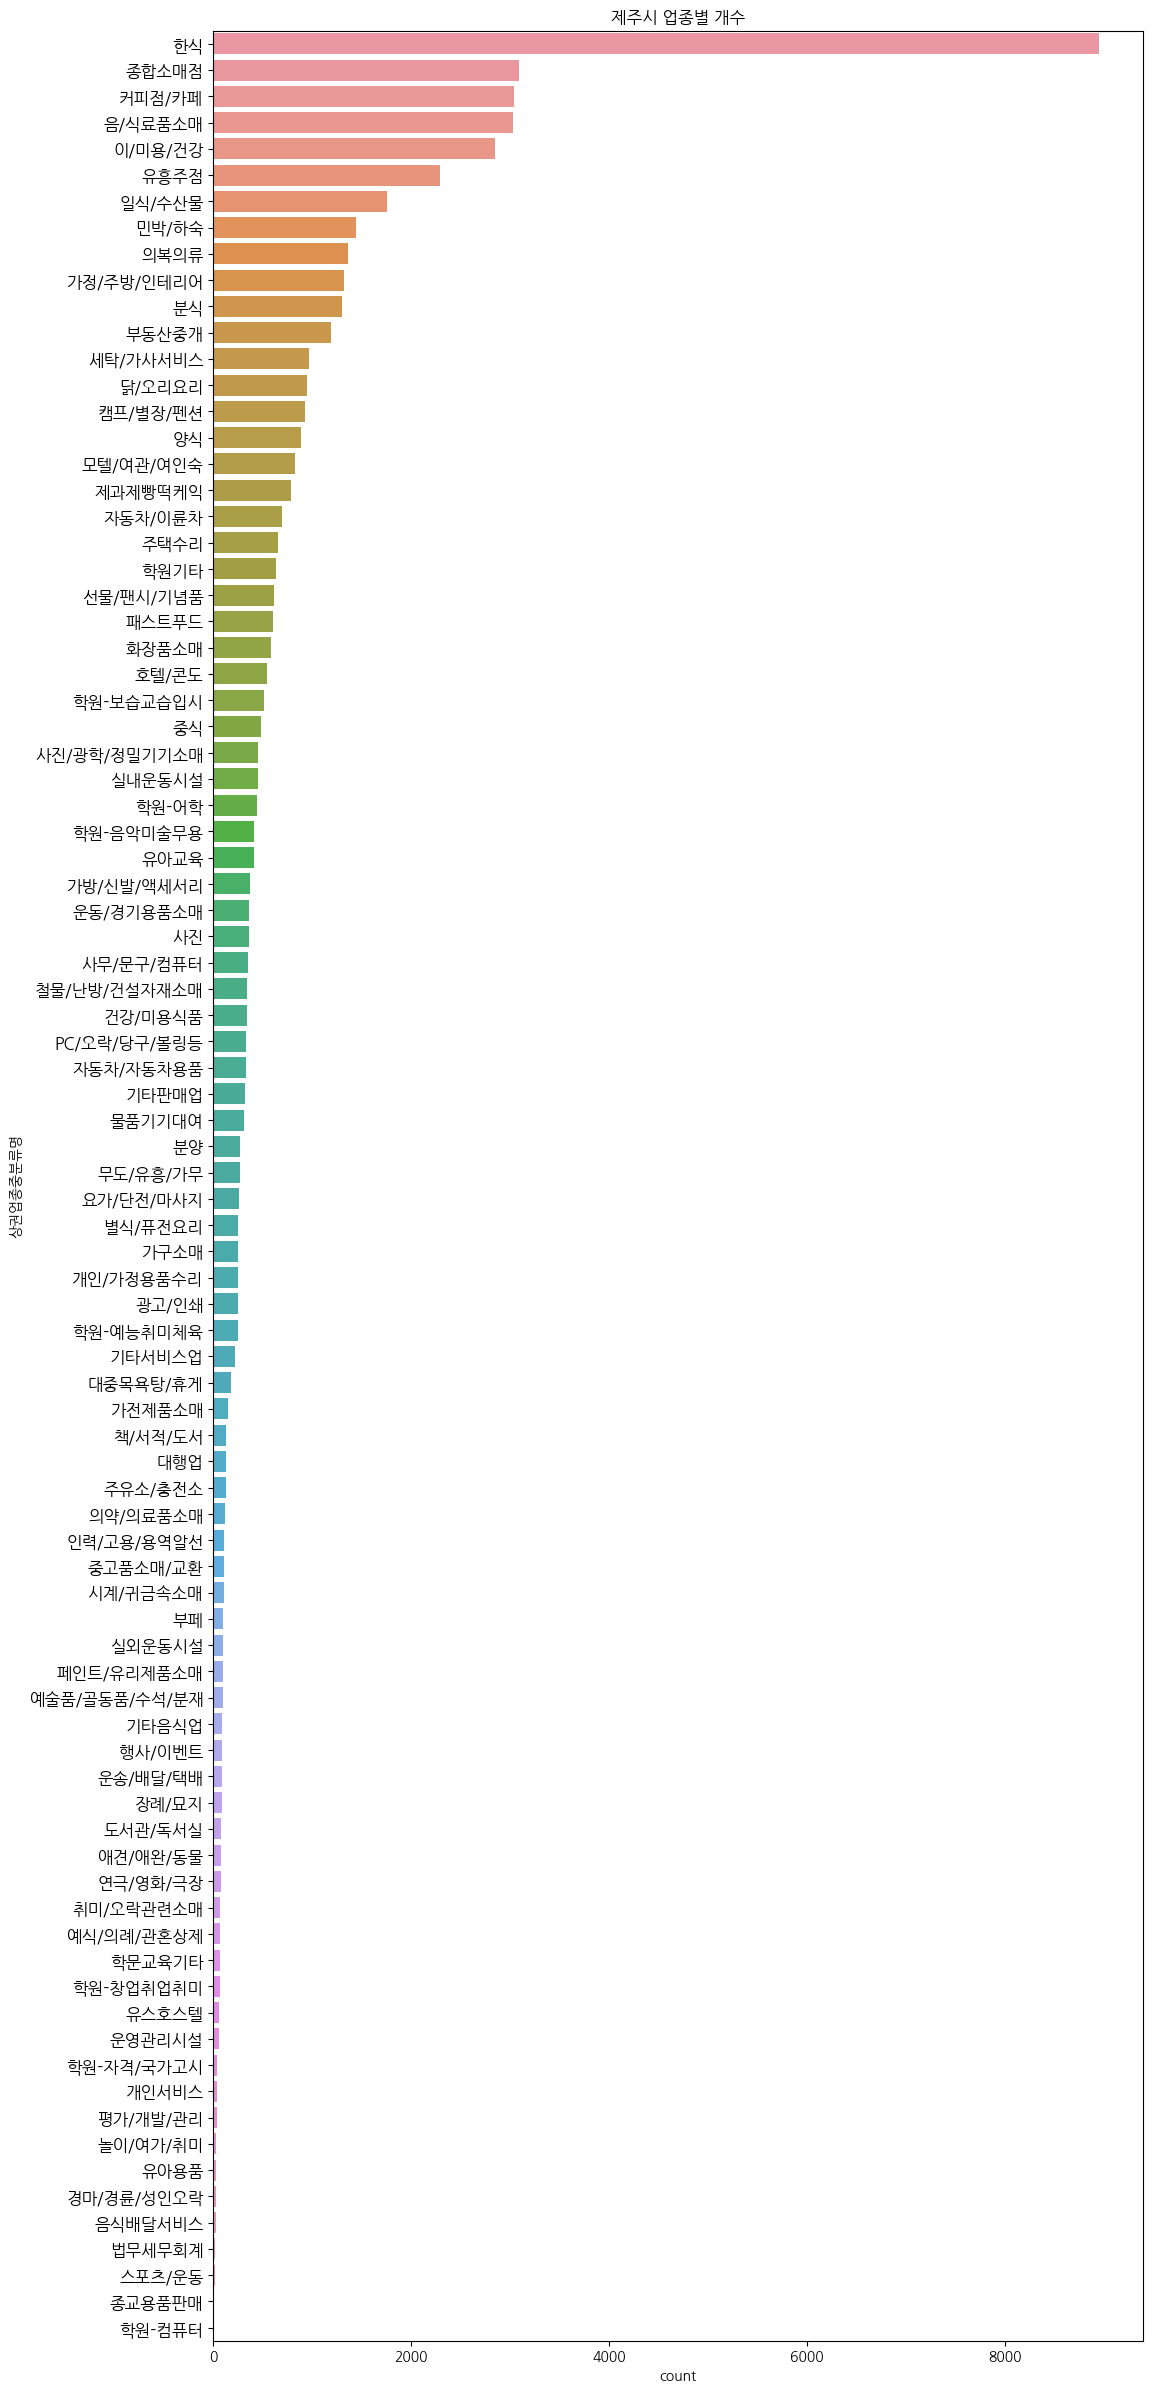

In [30]:
plt.figure(figsize=(12, 30))
sns.countplot(y=jeju['상권업종중분류명'], order=jeju['상권업종중분류명'].value_counts().index)
plt.yticks(fontsize=12)
plt.title('제주시 업종별 개수')
plt.show()

커피점/카페 업종은 자치구별로 어느 곳에 가장 많이 분포해 있는지 시각화

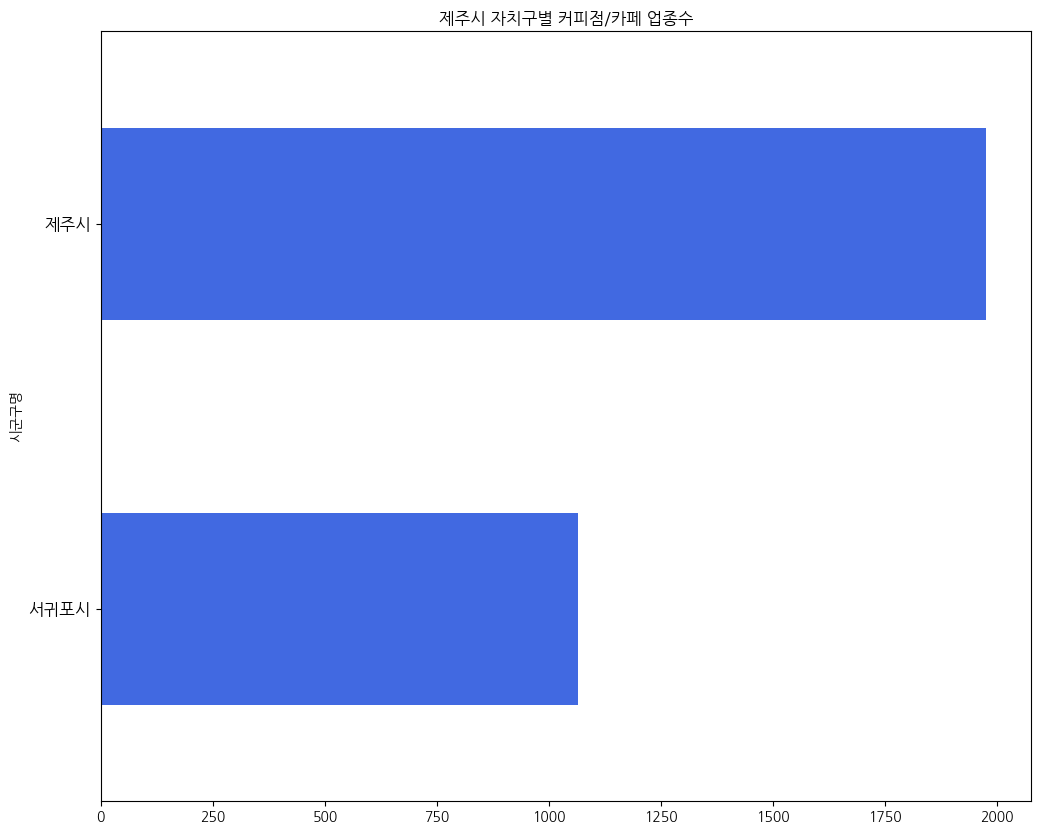

In [31]:
plt.figure(figsize=(12, 10))
jeju.loc[jeju['상권업종중분류명'] == '커피점/카페'].groupby('시군구명')['상권업종대분류명'].count()\
                                                     .sort_values().plot(kind='barh', color='royalblue')
plt.yticks(fontsize=12)
plt.title('제주시 자치구별 커피점/카페 업종수')
plt.show()

In [32]:
jeju_coffee = jeju.loc[jeju['상권업종중분류명'] == '커피점/카페']
jeju_coffee

시군구명 상권업종대분류명 상권업종중분류명         위도          경도
25      제주시       음식   커피점/카페  33.456186  126.710438
72      제주시       음식   커피점/카페  33.456081  126.556897
84      제주시       음식   커피점/카페  33.487651  126.492956
173     제주시       음식   커피점/카페  33.489192  126.490691
194     제주시       음식   커피점/카페  33.523128  126.583976
...     ...      ...      ...        ...         ...
52605  서귀포시       음식   커피점/카페  33.439791  126.865951
52607   제주시       음식   커피점/카페  33.545177  126.662237
52712   제주시       음식   커피점/카페  33.495510  126.532591
52752  서귀포시       음식   커피점/카페  33.249573  126.509793
52788   제주시       음식   커피점/카페  33.486036  126.414860

[3040 rows x 5 columns]

In [33]:
m = folium.Map(
    location=[33.50028185187966, 126.53145977090163],
    zoom_start=12,
    tiles='cartodbpositron'
)

folium.GeoJson(
    jeju_geojson,
    name='지역구'
).add_to(m)

클러스터를 추가하여 지도위에 시각화

In [34]:
marker_cluster = MarkerCluster().add_to(m)

for lat, long in zip(jeju_coffee['위도'], jeju_coffee['경도']):
    folium.Marker([lat, long], icon = folium.Icon(color="green")).add_to(marker_cluster)

m

Output hidden; open in https://colab.research.google.com to view.

In [38]:
jeju_group_data = jeju.loc[jeju['상권업종중분류명'] == '커피점/카페'].groupby('시군구명')['상권업종중분류명'].count()
jeju_group_data

시군구명
서귀포시    1064
제주시     1976
Name: 상권업종중분류명, dtype: int64

choropleth 를 사용하여 시각화를 하면 업종 별 개수에 따른 색상의 차이를 두어 시각화를 해줍니다.

In [36]:
from folium.features import Choropleth

m = folium.Map(
    location=[33.50028185187966, 126.53145977090163],
    zoom_start=11,
    tiles='cartodbpositron'
)

folium.GeoJson(
    jeju_geojson,
    name='지역명'
).add_to(m)

In [39]:
# 지역별로 커피 업종 수를 색깔로 표시
Choropleth(
    geo_data=jeju_geojson,
    data=jeju_group_data,
    columns=['시군구명', '커피 업종 수'],
    key_on='feature.properties.sggnm',
    fill_color='YlOrRd',
    fill_opacity=0.5,
    line_opacity=0.2,
    legend_name="지역별 커피 업종 수"
).add_to(m)

m


bins를 만들어 1/4, 2/4, 3/4분위수별로 구간을 나누어 시각화할 수 있습니다.

In [40]:
# GeoJSON에서 '읍', '면', '동' 정보 추출
geojson_areas = [feature['properties']['adm_nm'] for feature in jeju_geojson['features']]

# 일부 데이터 확인
geojson_areas[:10]

['제주특별자치도 제주시 한림읍',
 '제주특별자치도 제주시 애월읍',
 '제주특별자치도 제주시 구좌읍',
 '제주특별자치도 제주시 조천읍',
 '제주특별자치도 제주시 한경면',
 '제주특별자치도 제주시 추자면',
 '제주특별자치도 제주시 우도면',
 '제주특별자치도 제주시 일도1동',
 '제주특별자치도 제주시 일도2동',
 '제주특별자치도 제주시 이도1동']

In [41]:
# 상가 정보 데이터에서 '도로명주소'에서 '읍', '면', '동' 추출
df['행정구역'] = df['도로명주소'].str.extract(r'제주특별자치도 (제주시|서귀포시) ([^ ]*(읍|면|동))')[1]

# NaN 값 제거
sangga_info = df.dropna(subset=['행정구역'])

# 행정구역별로 상가 업종 수 집계
area_shop_data = df.groupby('행정구역').size().reset_index(name='상가 업종 수')

area_shop_data.head()


행정구역  상가 업종 수
0  간월동       53
1  거로동        5
2  고산동       89
3  과원동        1
4  광평동       50

In [42]:
# 두 데이터 사이의 일치하지 않는 행정구역 이름 확인
non_matching_areas_geojson = set(geojson_areas) - set(area_shop_data['행정구역'])
non_matching_areas_data = set(area_shop_data['행정구역']) - set(geojson_areas)

len(non_matching_areas_geojson), len(non_matching_areas_data), non_matching_areas_geojson, non_matching_areas_data

(43,
 62,
 {'제주특별자치도 서귀포시 남원읍',
  '제주특별자치도 서귀포시 대륜동',
  '제주특별자치도 서귀포시 대정읍',
  '제주특별자치도 서귀포시 대천동',
  '제주특별자치도 서귀포시 동홍동',
  '제주특별자치도 서귀포시 서홍동',
  '제주특별자치도 서귀포시 성산읍',
  '제주특별자치도 서귀포시 송산동',
  '제주특별자치도 서귀포시 안덕면',
  '제주특별자치도 서귀포시 영천동',
  '제주특별자치도 서귀포시 예래동',
  '제주특별자치도 서귀포시 정방동',
  '제주특별자치도 서귀포시 중문동',
  '제주특별자치도 서귀포시 중앙동',
  '제주특별자치도 서귀포시 천지동',
  '제주특별자치도 서귀포시 표선면',
  '제주특별자치도 서귀포시 효돈동',
  '제주특별자치도 제주시 건입동',
  '제주특별자치도 제주시 구좌읍',
  '제주특별자치도 제주시 노형동',
  '제주특별자치도 제주시 도두동',
  '제주특별자치도 제주시 봉개동',
  '제주특별자치도 제주시 삼도1동',
  '제주특별자치도 제주시 삼도2동',
  '제주특별자치도 제주시 삼양동',
  '제주특별자치도 제주시 아라동',
  '제주특별자치도 제주시 애월읍',
  '제주특별자치도 제주시 연동',
  '제주특별자치도 제주시 오라동',
  '제주특별자치도 제주시 외도동',
  '제주특별자치도 제주시 용담1동',
  '제주특별자치도 제주시 용담2동',
  '제주특별자치도 제주시 우도면',
  '제주특별자치도 제주시 이도1동',
  '제주특별자치도 제주시 이도2동',
  '제주특별자치도 제주시 이호동',
  '제주특별자치도 제주시 일도1동',
  '제주특별자치도 제주시 일도2동',
  '제주특별자치도 제주시 조천읍',
  '제주특별자치도 제주시 추자면',
  '제주특별자치도 제주시 한경면',
  '제주특별자치도 제주시 한림읍',
  '제주특별자치도 제주시 화북동'},
 {'간월동',
  '거로동',
  '고산동',
  '과원동',
  '광평동',
  '구남동',
  '구릉동',

In [43]:
# 행정구역명에 알맞은 접두어 추가
def add_city_prefix(area_name):
    if '제주시' in area_name or area_name.endswith('동'):
        return '제주특별자치도 제주시 ' + area_name
    else:
        return '제주특별자치도 서귀포시 ' + area_name

area_shop_data['행정구역'] = area_shop_data['행정구역'].apply(add_city_prefix)

# 일치하지 않는 행정구역명 재확인
non_matching_areas_geojson_revised = set(geojson_areas) - set(area_shop_data['행정구역'])
non_matching_areas_data_revised = set(area_shop_data['행정구역']) - set(geojson_areas)

len(non_matching_areas_geojson_revised), len(non_matching_areas_data_revised), non_matching_areas_geojson_revised, non_matching_areas_data_revised

(36,
 55,
 {'제주특별자치도 서귀포시 대륜동',
  '제주특별자치도 서귀포시 대천동',
  '제주특별자치도 서귀포시 동홍동',
  '제주특별자치도 서귀포시 서홍동',
  '제주특별자치도 서귀포시 송산동',
  '제주특별자치도 서귀포시 영천동',
  '제주특별자치도 서귀포시 예래동',
  '제주특별자치도 서귀포시 정방동',
  '제주특별자치도 서귀포시 중문동',
  '제주특별자치도 서귀포시 중앙동',
  '제주특별자치도 서귀포시 천지동',
  '제주특별자치도 서귀포시 효돈동',
  '제주특별자치도 제주시 건입동',
  '제주특별자치도 제주시 구좌읍',
  '제주특별자치도 제주시 노형동',
  '제주특별자치도 제주시 도두동',
  '제주특별자치도 제주시 삼도1동',
  '제주특별자치도 제주시 삼도2동',
  '제주특별자치도 제주시 삼양동',
  '제주특별자치도 제주시 아라동',
  '제주특별자치도 제주시 애월읍',
  '제주특별자치도 제주시 오라동',
  '제주특별자치도 제주시 외도동',
  '제주특별자치도 제주시 용담1동',
  '제주특별자치도 제주시 용담2동',
  '제주특별자치도 제주시 우도면',
  '제주특별자치도 제주시 이도1동',
  '제주특별자치도 제주시 이도2동',
  '제주특별자치도 제주시 이호동',
  '제주특별자치도 제주시 일도1동',
  '제주특별자치도 제주시 일도2동',
  '제주특별자치도 제주시 조천읍',
  '제주특별자치도 제주시 추자면',
  '제주특별자치도 제주시 한경면',
  '제주특별자치도 제주시 한림읍',
  '제주특별자치도 제주시 화북동'},
 {'제주특별자치도 서귀포시 구좌읍',
  '제주특별자치도 서귀포시 애월읍',
  '제주특별자치도 서귀포시 우도면',
  '제주특별자치도 서귀포시 조천읍',
  '제주특별자치도 서귀포시 추자면',
  '제주특별자치도 서귀포시 한경면',
  '제주특별자치도 서귀포시 한림읍',
  '제주특별자치도 제주시 간월동',
  '제주특별자치도 제주시 거로동',
  '제주특별자치도 제주시 고산

In [44]:
# 지도 초기화
m = folium.Map(
    location=[33.50028185187966, 126.53145977090163],
    zoom_start=11,
    tiles='cartodbpositron'
)

# 읍면동별로 상가 업종 수를 색깔로 표시
Choropleth(
    geo_data=jeju_geojson,
    data=area_shop_data,
    columns=['행정구역', '상가 업종 수'],
    key_on='feature.properties.adm_nm',
    fill_color='BuPu',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="읍면동별 상가 업종 수"
).add_to(m)

m

In [45]:
data = pd.read_excel("/content/구주소_20150707.xls")
data.head()

우편번호  일련번호 주    소 Unnamed: 3 Unnamed: 4 Unnamed: 5 Unnamed: 6  \
0       NaN   NaN     시도        시군구        읍면동          리         도서   
1  210821.0   1.0    강원도        강릉시        강동면        모전리        NaN   
2  210822.0   1.0    강원도        강릉시        강동면       산성우리        NaN   
3  210821.0  21.0    강원도        강릉시        강동면       상시동리        NaN   
4  210822.0  21.0    강원도        강릉시        강동면        심곡리        NaN   

  산\r\n번\r\n지 시작번지 Unnamed: 9  끝번지 Unnamed: 11 아파트/건물명  동범위 Unnamed: 14  \
0         NaN    주          부    주           부     NaN   시작           끝   
1         NaN  NaN        NaN  NaN         NaN     NaN  NaN         NaN   
2         NaN  NaN        NaN  NaN         NaN     NaN  NaN         NaN   
3         NaN  NaN        NaN  NaN         NaN     NaN  NaN         NaN   
4         NaN  NaN        NaN  NaN         NaN     NaN  NaN         NaN   

          변경일         주       소  
0         NaN               NaN  
1  20040517.0   강원도 강릉시 강동면 모전리  
2  20040517.0  강원도 강릉시 강동면 산성우리  
3  20040517.0  강원도 강릉시 강동면 상시동리  
4  20040517.0   강원도 강릉시 강동면 심곡리

In [46]:
# '우편번호'와 '주소' 컬럼만 추출
address_data = data[["우편번호", "주       소"]].copy()

# NaN 값 제거
address_data = address_data.dropna()

# 첫 줄은 헤더와 같은 정보이므로 제거
address_data = address_data.iloc[1:]

address_data.head()

우편번호         주       소
2  210822.0  강원도 강릉시 강동면 산성우리
3  210821.0  강원도 강릉시 강동면 상시동리
4  210822.0   강원도 강릉시 강동면 심곡리
5  210824.0   강원도 강릉시 강동면 안인리
6  210824.0  강원도 강릉시 강동면 안인진리

도로명 주소만 있는 데이터의 지번주호를 구하기 위해 구주소 데이터와 머지

In [47]:
# '우편번호' 컬럼을 실수에서 정수로 변환
address_data["우편번호"] = address_data["우편번호"].astype(int)

# 소상공인시장진흥공단의 데이터와 주소 데이터를 '구우편번호'로 합치기
merged_data_corrected = pd.merge(df, address_data, left_on="구우편번호", right_on="우편번호", how="left")

# 필요한 컬럼만 추출
result_data_corrected = merged_data_corrected[["구우편번호", "신우편번호", "주       소"]]

# 결과의 상위 부분 확인
result_data_corrected.head()

구우편번호  신우편번호                  주       소
0  697843  63591   제주특별자치도 서귀포시 서귀동 278~290
1  697843  63591   제주특별자치도 서귀포시 서귀동 257~272
2  697844  63592   제주특별자치도 서귀포시 서귀동 294~332
3  695932  63032        제주특별자치도 제주시 한림읍 한림리
4  690805  63102  제주특별자치도 제주시 노형동 2601~4000

In [48]:
import geopandas as gpd

# geojson 파일 로드
geo_data = gpd.read_file("/content/hangjeongdong_제주특별자치도.geojson")

# geojson 파일의 상위 부분 확인
geo_data.head()

OBJECTID           adm_nm   adm_cd     adm_cd2    sgg sido   sidonm sggnm  \
0      3394  제주특별자치도 제주시 한림읍  3901011  5011025000  50110   50  제주특별자치도   제주시   
1      3395  제주특별자치도 제주시 애월읍  3901012  5011025300  50110   50  제주특별자치도   제주시   
2      3396  제주특별자치도 제주시 구좌읍  3901013  5011025600  50110   50  제주특별자치도   제주시   
3      3397  제주특별자치도 제주시 조천읍  3901014  5011025900  50110   50  제주특별자치도   제주시   
4      3398  제주특별자치도 제주시 한경면  3901031  5011031000  50110   50  제주특별자치도   제주시   

                                            geometry  
0  MULTIPOLYGON (((126.23128 33.40475, 126.22994 ...  
1  MULTIPOLYGON (((126.44549 33.46855, 126.44519 ...  
2  MULTIPOLYGON (((126.90324 33.48334, 126.90026 ...  
3  MULTIPOLYGON (((126.70523 33.55405, 126.70551 ...  
4  MULTIPOLYGON (((126.16093 33.31226, 126.16170 ...

In [49]:
# 'adm_nm' 컬럼에서 읍, 면, 동 정보만 추출
geo_data["읍면동"] = geo_data["adm_nm"].apply(lambda x: x.split()[-1])

# 추출한 결과 확인
geo_data[["adm_nm", "읍면동"]].head()

adm_nm  읍면동
0  제주특별자치도 제주시 한림읍  한림읍
1  제주특별자치도 제주시 애월읍  애월읍
2  제주특별자치도 제주시 구좌읍  구좌읍
3  제주특별자치도 제주시 조천읍  조천읍
4  제주특별자치도 제주시 한경면  한경면

In [50]:
# result_data_corrected의 "주소"에서 시/도, 시/군/구, 읍/면/동 정보 추출
result_data_corrected["시도"] = result_data_corrected["주       소"].apply(lambda x: x.split()[0] if len(x.split()) > 0 else "")
result_data_corrected["시군구"] = result_data_corrected["주       소"].apply(lambda x: x.split()[1] if len(x.split()) > 1 else "")
result_data_corrected["읍면동"] = result_data_corrected["주       소"].apply(lambda x: x.split()[2] if len(x.split()) > 2 else "")

# geo_data의 "adm_nm"에서 시/도, 시/군/구, 읍/면/동 정보 추출
geo_data["시도"] = geo_data["adm_nm"].apply(lambda x: x.split()[0] if len(x.split()) > 0 else "")
geo_data["시군구"] = geo_data["adm_nm"].apply(lambda x: x.split()[1] if len(x.split()) > 1 else "")

# 확인
result_data_corrected[["시도", "시군구", "읍면동"]].head(), geo_data[["시도", "시군구", "읍면동"]].head()

(        시도   시군구  읍면동
 0  제주특별자치도  서귀포시  서귀동
 1  제주특별자치도  서귀포시  서귀동
 2  제주특별자치도  서귀포시  서귀동
 3  제주특별자치도   제주시  한림읍
 4  제주특별자치도   제주시  노형동,
         시도  시군구  읍면동
 0  제주특별자치도  제주시  한림읍
 1  제주특별자치도  제주시  애월읍
 2  제주특별자치도  제주시  구좌읍
 3  제주특별자치도  제주시  조천읍
 4  제주특별자치도  제주시  한경면)

In [51]:
# 두 데이터셋을 시/도, 시/군/구, 읍/면/동 기준으로 매핑
merged_by_address = pd.merge(geo_data, result_data_corrected, on=["시도", "시군구", "읍면동"], how="left")

# 각 읍/면/동별 상가 개수 집계
store_counts_by_address = merged_by_address.groupby(["시도", "시군구", "읍면동"]).size().reset_index(name="상가개수")

# geo_data와 상가 개수 데이터 매핑
final_merged = pd.merge(geo_data, store_counts_by_address, on=["시도", "시군구", "읍면동"], how="left")

# NaN 값을 0으로 대체
final_merged["상가개수"].fillna(0, inplace=True)

final_merged[["시도", "시군구", "읍면동", "상가개수"]].head()

시도  시군구  읍면동  상가개수
0  제주특별자치도  제주시  한림읍  2145
1  제주특별자치도  제주시  애월읍  3601
2  제주특별자치도  제주시  구좌읍  2488
3  제주특별자치도  제주시  조천읍  2051
4  제주특별자치도  제주시  한경면  1139

In [52]:
# 지도 생성
jeju_coordinates_updated = [33.3666, 126.5333]
m2 = folium.Map(location=jeju_coordinates_updated, zoom_start=10, tiles="cartodbpositron")

# 상가 개수에 따른 색상 설정
folium.Choropleth(
    geo_data=final_merged.to_json(),
    name="choropleth",
    data=final_merged,
    columns=["읍면동", "상가개수"],
    key_on="feature.properties.읍면동",
    fill_color="YlGn",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="상가 개수"
).add_to(m2)

# 지도에 상점 개수를 표시
for _, row in final_merged.iterrows():
    if row["상가개수"] > 0:
        centroid = row["geometry"].centroid
        folium.CircleMarker(
            location=[centroid.y, centroid.x],
            radius=5,
            popup=f"{row['읍면동']} : {row['상가개수']}개",
            fill=True,
            fill_color="#3186cc",
            fill_opacity=0.7,
            color="white",
            weight=0.5,
        ).add_to(m2)

m2